<a href="https://colab.research.google.com/github/haalcala/NYP-SDAI/blob/master/ITI105/project/Fraud_detection_harold_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/></a>


# Fraud detection using Logistic Regression

In [1]:
import requests
import io
import os

try:
    os.mkdir("./tmp")
except:
    pass

external_files = [
  {
      "url":"https://raw.githubusercontent.com/haalcala/NYP-SDAI/master/ITI105/project/ds_util.py",
      "local_file":"ds_util.py"
  },
  {
      "url":"https://raw.githubusercontent.com/haalcala/NYP-SDAI/master/ITI105/project/files/bs140513_032310.csv",
      "local_file":"bs140513_032310.csv"
  },
]

for ext_file in external_files:
  req = requests.get(ext_file["url"])

  print(ext_file["local_file"], len(req.content))

  f = open("./tmp/" + ext_file["local_file"],"wb")

  f.write(req.content)

ds_util.py 1924
bs140513_032310.csv 48391391



## load and prepare data


In [2]:
import tmp.ds_util as util

ds_util = util.DSUtil()
ds_util.load_csv("./tmp/bs140513_032310.csv")

# analyse data composition
ds_util.blow_my_mind()

args: {}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None
unique step    180
dtype: int64
unique customer    4112
dtype: int64
unique age    8
dtype: int64
unique gender    4
dtype: int64
unique zipcodeOri    1
dtype: int64
unique merchant    50
dtype: int64
unique zipMerchant    1
dtype: int64
unique category    15
dtype: int64
unique amount    23767


### drop columns not needed for calculations and get dummy variables

In [3]:
ds_util.drop_columns(["customer", "zipMerchant", "zipcodeOri"])

df = ds_util.get_dummies()

df

,step,amount,fraud,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Logistic Regression Stuffs                  

### Environment initialisation

In [4]:
from sklearn.model_selection import train_test_split

#We need to import the k-NN Classifier from skleart.neighbors

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
import numpy as np

target_column = "fraud"

y = df[target_column]

X = df.drop(target_column, axis=1)

sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(X, y)
print(y.value_counts(), np.bincount(y_res))

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.8, shuffle=True, random_state=42)


0    587443
1      7200
Name: fraud, dtype: int64 [587443 587443]


In [5]:
y_test.value_counts()

0    117625
1    117353
Name: fraud, dtype: int64

### Training

In [11]:

# lr_clf = LogisticRegression(solver='liblinear', random_state=42)
lr_clf = LogisticRegression(solver='liblinear', C=1000, random_state=42)

y_pred = None

def train_fn():
    global lr_clf
    
    lr_clf.fit(X_train, y_train)

ds_util.activity_wrapper("Training", train_fn)

Training ...
Training ... done. 6.303353 seconds


datetime.timedelta(seconds=6, microseconds=303353)

### Testing


Testing ...
accuracy_score: 0.9950718790695299
cross_val_score: [0.99496334 0.99520273 0.99509738]
confusion_matrix [[467639   2179]
 [  2438 467652]]
recall_score: 0.9953620338088366
precision_score: 0.9948136156416928
f1_score: 0.9950877491634703
classification_report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    469818
           1       1.00      0.99      1.00    470090

    accuracy                           1.00    939908
   macro avg       1.00      1.00      1.00    939908
weighted avg       1.00      1.00      1.00    939908

[-8.15454195 -0.75706706 12.92402662 ... -8.68704905  9.73523537
 -8.88886374]


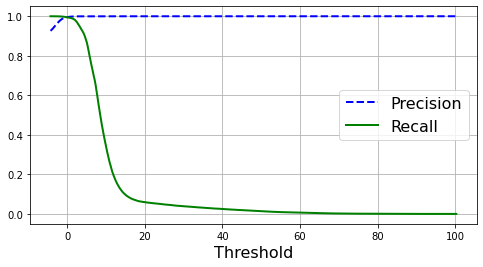

Testing ... done. 47.880039 seconds
All done.


In [13]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                                           

def test_fn():
    global y_pred
    
    y_pred = lr_clf.predict(X_test) 
    
    print("accuracy_score:", accuracy_score(y_test, y_pred))
    
    print("cross_val_score:", cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="accuracy"))
    
    y_train_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)
    
    print("confusion_matrix", confusion_matrix(y_train, y_train_pred))
    
#     y_train_perfect_predictions = y_train
    
#     print("confusion_matrix", confusion_matrix(y_train, y_train_perfect_predictions))
    
    print("recall_score:", recall_score(y_train, y_train_pred, pos_label=0))
    print("precision_score:", precision_score(y_train, y_train_pred, pos_label=0))
    print("f1_score:",f1_score(y_train, y_train_pred, pos_label=0))
    
    print("classification_report:")
    print(classification_report(y_train, y_train_pred))

    
    y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3, method="decision_function")
    
    print(y_scores)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    
    plt.figure(figsize=(8, 4))                      
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    
    plt.show()
        
ds_util.activity_wrapper("Testing", test_fn)

print("All done.")

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )
        
import pandas as pd

# def test_params():
plt.figure(figsize=(10, 10))

C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

results_table = pd.DataFrame(columns = ["C_param", "Training Time", "Accuracy", "X-Val"])
results_table["C_param"] = C_param_range

X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((y_train, y_test))

j = 0
for i in C_param_range:
    print("i:",i)
    # Apply logistic regression model to training data
#     lr = LogisticRegression(solver='saga', max_iter=1000, n_jobs=4, C=i, random_state=42)
    lr = LogisticRegression(solver='liblinear', max_iter=1000, C=i, random_state=42)

    y_pred = None

    def train_fn():
        global lr
        
        lr.fit(X_train, y_train)

    elapsed = ds_util.activity_wrapper("Training", train_fn)
    
    y_pred = lr.predict(X_test) 

    print("elapsed:", elapsed)

    accuracy_result = accuracy_score(y_test, y_pred)
    cross_val_result = cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy")
    
    print("accuracy_score:", accuracy_result)
    print("cross_val_score:", cross_val_result)
    
    # Saving accuracy score in table
    results_table.iloc[j,1] = str(elapsed.total_seconds()) + " secs"
    results_table.iloc[j,2] = str(accuracy_result)
    results_table.iloc[j,3] = str(cross_val_result)
    j += 1
    
    # Printing decision regions
    # plt.subplot(3,2,j)
    # plt.subplots_adjust(hspace = 0.4)
    # plot_decision_regions(X = X_combined
    #                   , y = Y_combined
    #                   , classifier = lr
    #                   , test_idx = range(105,150))
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')
    # plt.title('C = %s'%i)

    print("------------------------------------")

# test_params()

results_table

i: 0.001
Training ...
Training ... done. 5.117901 seconds
elapsed: 0:00:05.117901
accuracy_score: 0.9876967205440509
cross_val_score: [0.98543582 0.98601673 0.98513894]
------------------------------------
i: 0.01
Training ...
Training ... done. 5.153251 seconds
elapsed: 0:00:05.153251
accuracy_score: 0.9898501136276587
cross_val_score: [0.99020437 0.99041184 0.98967131]
------------------------------------
i: 0.1
Training ...
Training ... done. 6.03201 seconds
elapsed: 0:00:06.032010
accuracy_score: 0.9950931576573127
cross_val_score: [0.99512612 0.9957964  0.99348871]
------------------------------------
i: 1
Training ...
Training ... done. 5.831187 seconds
elapsed: 0:00:05.831187
accuracy_score: 0.9950761347870865
cross_val_score: [0.99509421 0.99520273 0.99507823]
------------------------------------
i: 10
Training ...
Training ... done. 6.94615 seconds
elapsed: 0:00:06.946150
accuracy_score: 0.9950761347870865
cross_val_score: [0.99509101 0.99520592 0.99509738]
-------------------

,C_param,Training Time,Accuracy,X-Val
0,0.001,5.117901 secs,0.9876967205440509,[0.98543582 0.98601673 0.98513894]
1,0.010,5.153251 secs,0.9898501136276587,[0.99020437 0.99041184 0.98967131]
2,0.100,6.03201 secs,0.9950931576573127,[0.99512612 0.9957964 0.99348871]
3,1.000,5.831187 secs,0.9950761347870865,[0.99509421 0.99520273 0.99507823]
4,10.000,6.94615 secs,0.9950761347870865,[0.99509101 0.99520592 0.99509738]
5,100.000,6.047052 secs,0.9950718790695299,[0.99509101 0.99520592 0.99509738]
6,1000.000,5.113626 secs,0.9950718790695299,[0.99496334 0.99520273 0.99509738]
7,10000.000,6.162683 secs,0.9950718790695299,[0.99509101 0.99520592 0.99509738]


<Figure size 720x720 with 0 Axes>